In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Transmission messages
messages = np.array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0])

carrierFreq = 50.0
timePeriod = 1.0/carrierFreq
samplingFreq = 1000.0
samplingPeriod = 1.0/samplingFreq

symbolRate = 25.0

t = np.arange(0.0, 2.0*timePeriod, samplingPeriod)

# Serial parallel conversion
symbols = np.array([messages[0:: 2], messages[1:: 2]])

In [4]:
theta = np.zeros(np.size(symbols, axis=1), dtype='float')  # Reserving the area of theta
for k in range(np.size(symbols, axis=1)):
    bit1 = symbols[0,k]  # Above the kth symbol
    bit2 = symbols[1,k]  # Below the kth symbol
    if bit1 == 0 and bit2 == 0:
        theta[k] = np.math.pi/4.0      # theta is pi/4 if the symbol is [[0], [0]]
    elif bit1 == 0 and bit2 == 1:
        theta[k] = 3.0*np.math.pi/4.0  # theta is 3*pi/4 if the symbol is [[0], [1]]
    elif bit1 == 1 and bit2 == 1:
        theta[k] = 5.0*np.math.pi/4.0  # theta is 5*pi/4 if the symbol is [[1], [1]]
    elif bit1 == 1 and bit2 == 0:
        theta[k] = 7.0*np.math.pi/4.0  # theta is 7*pi/4 if the symbol is [[1], [0]]
    
amplitude = 1.0  # PSK has constant amplitude

uI = amplitude*np.cos(theta)  # Change due to modulation with in-phase component
uQ = amplitude*np.sin(theta)  # Change due to modulation with quadrature component

modulatedSignal = np.zeros(np.size(symbols, axis=1)*t.size, dtype='float')  # Reserving the area of modulated waves
for k in range(np.size(symbols, axis=1)):
    # Calculates modulated wave for each symbol
    modulatedSignal[k*t.size:(k+1)*t.size] = uI[k]*np.cos(2.0*np.math.pi*carrierFreq*t) - uQ[k]*np.sin(2.0*np.math.pi*carrierFreq*t)

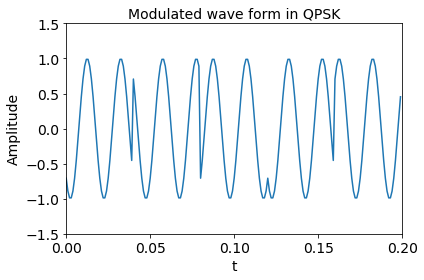

In [6]:
plt.figure()
plt.plot(np.arange(0.0, np.size(symbols, axis=1)*2.0*timePeriod, samplingPeriod), modulatedSignal)  # Plot modulated wave
plt.axis([0.0, 0.2, -1.5, 1.5])                        # Set display area
plt.title("Modulated wave form in QPSK", fontsize=14)  # Title
plt.xlabel("t", fontsize=14)                           # x axis labels
plt.ylabel("Amplitude", fontsize=14)                   # y axis labels
plt.tick_params(labelsize=14)                          # Font size
plt.tight_layout()                                     # Tight layout

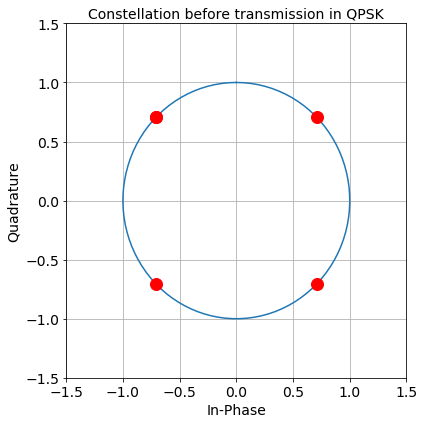

In [7]:
plt.figure(figsize=(6, 6))                                           # Set the aspect ratio to 1
tt = np.linspace(0.0, 2.0*np.math.pi, 100)                           # Create 100 equal-spacedvectors of [0 2 pi]
plt.plot(np.sin(tt), np.cos(tt))                                     # Plot of circle
plt.axis([-1.5, 1.5, -1.5, 1.5])                                     # Set display area
plt.plot(uI, uQ, "ro", markersize=12)                                # Plot constellation
plt.grid()                                                           # Enable grid
plt.title("Constellation before transmission in QPSK", fontsize=14)  # Title
plt.xlabel("In-Phase", fontsize=14)                                  # x axis labels
plt.ylabel("Quadrature", fontsize=14)                                # y axis labels
plt.tick_params(labelsize=14)                                        # Font size
plt.tight_layout()                                                   # Tight layout